### *import drive from google colab*

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### *import os for change dir,*
### and print list of file in that dir

In [0]:
import os
os.chdir("/content/drive/My Drive/")
!ls

 1511348737868.jpg
 20176032.jpg
 20176032.zip
 adi_fingr_match.ino
'Application for NOC_ka paisa.pdf'
 backup3
 c
 catboost_info
'Code of Conduct for outside participation of Institute team.pdf'
'colab notebook'
'Colab Notebooks'
'“Common Probability Distributions”'
 data.csv
 data.gsheet
 DSC_0200.jpg
 expenditure.pdf
'HEAT_PRODUCE_IN_DISC_BRAKES[1].pdf'
'HEAT PRODUCE IN DISC BRAKES.pdf'
 home
'home_pro (1)'
 images
 IMG_20171111_122912.jpg
 IMG_20180219_004035.jpg
 IMG_20180219_004052.jpg
 IMG_20180219_004054.jpg
 IMG_20180219_004056.jpg
 IMG_20180219_004124.jpg
 IMG_20180826_125315.jpg
 IMG_20180908_235639.jpg
 IMG_20180909_000050.jpg
 IMG_20181007_025546.jpg
 IMG_20181007_025550.jpg
 IMG_20181027_105700.jpg
 IMG-20190910-WA0001.jpg
 Introduction_To_ML_Partial_2.pdf
 ML_Lecture2.pdf
 MNNIT-F01012018000032.pdf
 networking.pdf
 noc2-1.pdf
 result_ola2.csv
 result_ola3.csv
'Resume Conversion and Single Page Formats.zip'
 Screenshot_2017-10-29-21-36-43-102_com.whatsapp.png
'Screenshot_

### import pandas for reading .csv files and load train and test file of the problem

In [0]:
import pandas as pd
train = pd.read_csv("train_ola.csv")
test = pd.read_csv("test (1).csv")
test = test[:154235]
print(test.shape)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (20,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(154235, 27)


### print the data types of train data

In [0]:
train.dtypes

ID                      int64
vendor_id               int64
pickup_loc              int64
drop_loc                int64
driver_tip            float64
tax                   float64
distance              float64
Pickup_date             int64
pickup_month            int64
pickup_hour             int64
pickup_min              int64
pickup_sec              int64
drop_hour               int64
drop_min                int64
drop_sec                int64
duration                int64
num_passengers          int64
toll_amount           float64
payment_method          int64
rate_code               int64
stored_flag            object
extra_charges         float64
improvement_charge    float64
total_amount          float64
pickup_time            object
drop_time              object
dtype: object

### print the test data types

In [0]:
test.dtypes

ID                    float64
vendor_id             float64
pickup_loc            float64
drop_loc              float64
driver_tip            float64
mta_tax               float64
distance              float64
pday                    int64
pmonth                  int64
#VALUE!                 int64
#VALUE!.1               int64
0                       int64
0.1                     int64
0.2                     int64
0.3                     int64
#VALUE!.2               int64
num_passengers        float64
toll_amount           float64
payment_method        float64
rate_code             float64
stored_flag            object
extra_charges         float64
improvement_charge    float64
pickup_tim             object
e                      object
drop_time              object
Unnamed: 26            object
dtype: object

In [0]:
train.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,tax,distance,Pickup_date,pickup_month,pickup_hour,pickup_min,pickup_sec,drop_hour,drop_min,drop_sec,duration,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,total_amount,pickup_time,drop_time
0,0,1,170,233,1.83,0.5,0.70,4,4,17,59,0,18,5,0,360,1,0.0,1,1,N,1.0,0.3,9.13,17:59:00,18:05:00
1,1,2,151,243,3.56,0.5,4.64,4,3,19,3,0,19,20,0,1020,1,0.0,1,1,N,1.0,0.3,21.36,19:03:00,19:20:00
2,2,2,68,90,1.50,0.5,1.29,4,3,15,6,0,15,12,0,360,2,0.0,1,1,N,0.0,0.3,8.80,15:06:00,15:12:00
3,3,2,142,234,1.50,0.5,2.74,4,4,8,10,0,8,27,0,1020,1,0.0,1,1,N,0.0,0.3,14.80,08:10:00,08:27:00
4,4,2,238,238,0.00,0.5,0.45,4,5,14,2,0,14,5,0,180,6,0.0,2,1,N,0.0,0.3,4.80,14:02:00,14:05:00


### import useful model and lib

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,BatchNormalization,Dropout

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 

import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

#import warnings 
#warnings.filterwarnings('ignore')
#warnings.filterwarnings('ignore', category=DeprecationWarning)
#from xgboost import XGBRegressor

### plot the corelation matrix for choosing important features

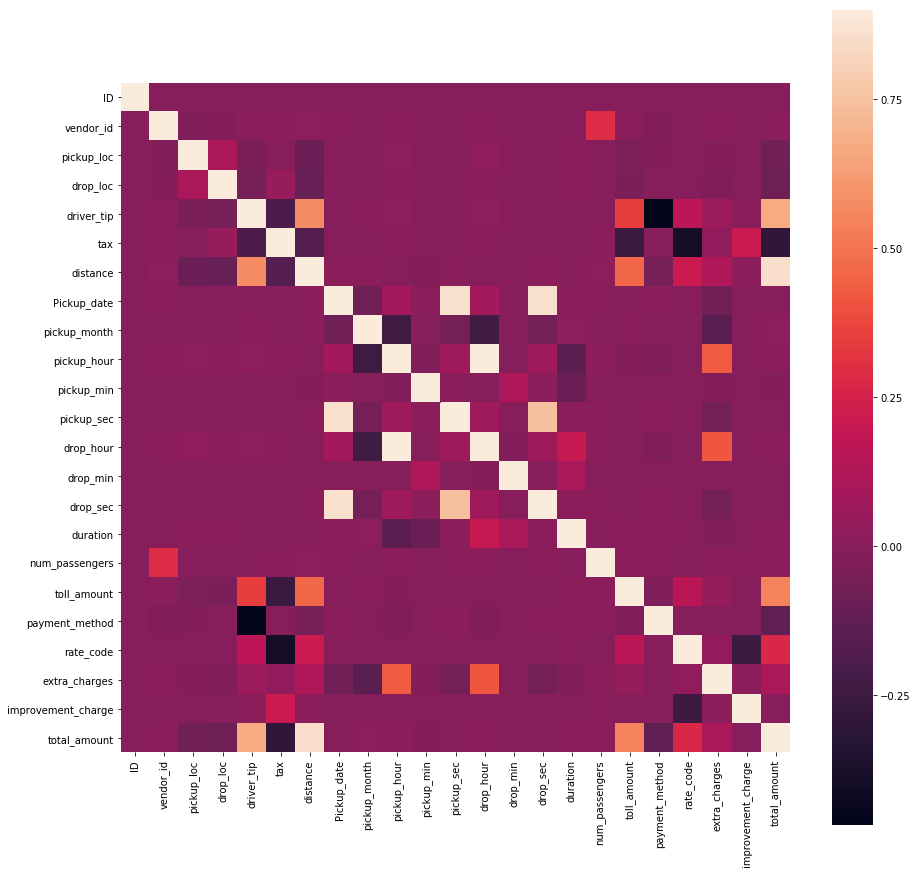

In [0]:
C_mat = train.corr()
fig = plt.figure(figsize=(15,15))

sb.heatmap(C_mat,vmax=.9,square=True)
plt.show()

In [0]:
train.dtypes

ID                      int64
vendor_id               int64
pickup_loc              int64
drop_loc                int64
driver_tip            float64
tax                   float64
distance              float64
Pickup_date             int64
pickup_month            int64
pickup_hour             int64
pickup_min              int64
pickup_sec              int64
drop_hour               int64
drop_min                int64
drop_sec                int64
duration                int64
num_passengers          int64
toll_amount           float64
payment_method          int64
rate_code               int64
stored_flag            object
extra_charges         float64
improvement_charge    float64
total_amount          float64
pickup_time            object
drop_time              object
dtype: object

### make 2 new dataframes
### 1. continuous
### 2. numeric

In [0]:
new_con = pd.DataFrame()
new_num = pd.DataFrame()

### add continuous features in new_con dats frame

In [0]:
new_con['pickup_loc'] = train['pickup_loc']
new_con['drop_loc'] = train['pickup_loc']
new_con['distance'] = train['distance']
new_con['driver_tip'] = train['driver_tip']
new_con['toll_amount'] = train['toll_amount']


### add numeric features in new_num data frame

In [0]:
new_num['tax'] = train['tax']
new_num['payment_method']= train['payment_method']
new_num['rate_code'] = train['rate_code']
new_num['extra_charges'] = train['extra_charges']

### split all numeric features

In [0]:
dummies = pd.get_dummies(new_num['tax'],prefix='tax')
new_con = pd.concat([new_con,dummies],axis=1)
new_con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5
0,170,170,0.70,1.83,0.0,0,1
1,151,151,4.64,3.56,0.0,0,1
2,68,68,1.29,1.50,0.0,0,1
3,142,142,2.74,1.50,0.0,0,1
4,238,238,0.45,0.00,0.0,0,1


In [0]:
dummies = pd.get_dummies(new_num['payment_method'],prefix='payment_method')
new_con = pd.concat([new_con,dummies],axis=1)
new_con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4
0,170,170,0.70,1.83,0.0,0,1,1,0,0,0
1,151,151,4.64,3.56,0.0,0,1,1,0,0,0
2,68,68,1.29,1.50,0.0,0,1,1,0,0,0
3,142,142,2.74,1.50,0.0,0,1,1,0,0,0
4,238,238,0.45,0.00,0.0,0,1,0,1,0,0


In [0]:
dummies = pd.get_dummies(new_num['rate_code'],prefix='rate_code')
new_con = pd.concat([new_con,dummies],axis=1)
new_con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,rate_code_99
0,170,170,0.70,1.83,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,151,151,4.64,3.56,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,68,68,1.29,1.50,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,142,142,2.74,1.50,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,238,238,0.45,0.00,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0


In [0]:
#dummies = pd.get_dummies(new_num['extra_charges'],prefix='extra_charges')
#new_con = pd.concat([new_con,dummies],axis=1)
new_con['extra_charges'] = new_num['extra_charges']
new_con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,rate_code_99,extra_charges
0,170,170,0.70,1.83,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1.0
1,151,151,4.64,3.56,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,1.0
2,68,68,1.29,1.50,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
3,142,142,2.74,1.50,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
4,238,238,0.45,0.00,0.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0.0


### make the target array

In [0]:
target = train['total_amount']
target.shape

(1048052,)

In [0]:
train_data = new_con
train_data.shape

(1048052, 19)

### make a simple NN model with all dense layer with activation = relu

In [0]:
model = Sequential()
model.add(Dense(128,kernel_initializer='normal',input_dim=train_data.shape[1],activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization(axis=-1))

model.add(Dense(256,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
#model.add(Dense(256,kernel_initializer='normal',activation='relu'))
#model.add(Dense(128,kernel_initializer='normal',activation='relu'))
#model.add(Dense(128,kernel_initializer='normal',activation='relu'))
#modle.add(BatchNormalization(axis=-1))
#model.add(Dense(128,kernel_initializer='normal',activation='relu'))
#model.add(BatchNormalization(axis=-1))

model.add(Dense(64,kernel_initializer='normal',activation='relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.2))
model.add(Dense(1,kernel_initializer='normal',activation='linear'))
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 128)               2560      
_________________________________________________________________
batch_normalization_47 (Batc (None, 128)               512       
_________________________________________________________________
dense_57 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_48 (Batc (None, 256)               1024      
_________________________________________________________________
dense_58 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_49 (Batc (None, 256)               1024      
_________________________________________________________________
dense_59 (Dense)             (None, 256)             

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

### train the model with split train and validation set 0.2

In [0]:
model.fit(train_data,target, 
          epochs=4,
          batch_size=32,
          validation_split = 0.1,
          callbacks=callbacks_list)


Train on 943246 samples, validate on 104806 samples
Epoch 1/4
943246/943246 [==============================] - 557s 591us/step - loss: 3.1156 - mean_absolute_error: 3.1156 - val_loss: 3.0198 - val_mean_absolute_error: 3.0198

Epoch 00001: val_loss improved from inf to 3.01984, saving model to Weights-001--3.01984.hdf5
Epoch 2/4
943246/943246 [==============================] - 557s 590us/step - loss: 2.8198 - mean_absolute_error: 2.8198 - val_loss: 3.0162 - val_mean_absolute_error: 3.0162

Epoch 00002: val_loss improved from 3.01984 to 3.01624, saving model to Weights-002--3.01624.hdf5
Epoch 3/4
943246/943246 [==============================] - 540s 572us/step - loss: 2.7687 - mean_absolute_error: 2.7687 - val_loss: 2.7367 - val_mean_absolute_error: 2.7367

Epoch 00003: val_loss improved from 3.01624 to 2.73667, saving model to Weights-003--2.73667.hdf5
Epoch 4/4
943246/943246 [==============================] - 547s 579us/step - loss: 2.7487 - mean_absolute_error: 2.7487 - val_loss: 3.69

### Training....

In [0]:
model.fit(train_data,target,
          epochs=4,
          batch_size=32,
          validation_split = 0.1,
          callbacks=callbacks_list)

Train on 838441 samples, validate on 209611 samples
Epoch 1/3
838441/838441 [==============================] - 217s 259us/step - loss: 1.2848 - mean_absolute_error: 1.2848 - val_loss: 1.2436 - val_mean_absolute_error: 1.2436

Epoch 00001: val_loss improved from 1.24628 to 1.24362, saving model to Weights-001--1.24362.hdf5
Epoch 2/3
838441/838441 [==============================] - 217s 259us/step - loss: 1.2750 - mean_absolute_error: 1.2750 - val_loss: 1.3073 - val_mean_absolute_error: 1.3073

Epoch 00002: val_loss did not improve from 1.24362
Epoch 3/3
838441/838441 [==============================] - 216s 257us/step - loss: 1.2708 - mean_absolute_error: 1.2708 - val_loss: 1.2950 - val_mean_absolute_error: 1.2950

Epoch 00003: val_loss did not improve from 1.24362


In [0]:
model.fit(train_data,target,
          epochs=5,
          batch_size=32,
          validation_split = 0.1,
          callbacks=callbacks_list)

Train on 943246 samples, validate on 104806 samples
Epoch 1/5
943246/943246 [==============================] - 270s 287us/step - loss: 2.2756 - mean_absolute_error: 2.2756 - val_loss: 2.1244 - val_mean_absolute_error: 2.1244

Epoch 00001: val_loss did not improve from 2.05260
Epoch 2/5
943246/943246 [==============================] - 272s 289us/step - loss: 2.2549 - mean_absolute_error: 2.2549 - val_loss: 2.4136 - val_mean_absolute_error: 2.4136

Epoch 00002: val_loss did not improve from 2.05260
Epoch 3/5
943246/943246 [==============================] - 271s 287us/step - loss: 2.2447 - mean_absolute_error: 2.2447 - val_loss: 2.1659 - val_mean_absolute_error: 2.1659

Epoch 00003: val_loss did not improve from 2.05260
Epoch 4/5
943246/943246 [==============================] - 264s 280us/step - loss: 2.2227 - mean_absolute_error: 2.2227 - val_loss: 2.6177 - val_mean_absolute_error: 2.6177

Epoch 00004: val_loss did not improve from 2.05260
Epoch 5/5
943246/943246 [=======================

## Test Part

In [0]:
test.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pday,pmonth,#VALUE!,#VALUE!.1,0,0.1,0.2,0.3,#VALUE!.2,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,pickup_tim,e,drop_time,Unnamed: 26
0,0.0,1.0,68.0,186.0,1.00,0.5,0.70,4,5,5,49,0,5,54,0,300,1.0,0.0,1.0,1.0,N,0.5,0.3,04-05-2017 00:00,05:49:00,04-05-2017 00:00,05:54:00
1,1.0,1.0,170.0,161.0,2.55,0.5,1.00,4,7,8,57,0,9,16,0,1140,1.0,0.0,1.0,1.0,N,0.0,0.3,04-07-2017 00:00,08:57:00,04-07-2017 00:00,09:16:00
2,2.0,2.0,13.0,246.0,2.96,0.5,3.35,4,6,8,6,0,8,21,0,900,2.0,0.0,1.0,1.0,N,0.0,0.3,04-06-2017 00:00,08:06:00,04-06-2017 00:00,08:21:00
3,3.0,1.0,170.0,233.0,2.00,0.5,0.80,4,4,8,31,0,8,37,0,360,2.0,0.0,1.0,1.0,N,0.0,0.3,04-04-2017 00:00,08:31:00,04-04-2017 00:00,08:37:00
4,4.0,1.0,237.0,236.0,1.00,0.5,0.70,4,7,10,54,0,11,0,0,360,1.0,0.0,1.0,1.0,Y,0.0,0.3,04-07-2017 00:00,10:54:00,04-07-2017 00:00,11:00:00


### make 2 data frames as in training data 

In [0]:
con = pd.DataFrame()
num = pd.DataFrame()

### add all continuous features in con data frame

In [0]:
con['pickup_loc'] = test['pickup_loc']
con['drop_loc'] = test['pickup_loc']
con['distance'] = test['distance']
con['driver_tip'] = test['driver_tip']
con['toll_amount'] = test['toll_amount']

In [0]:
con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount
0,68.0,68.0,0.70,1.00,0.0
1,170.0,170.0,1.00,2.55,0.0
2,13.0,13.0,3.35,2.96,0.0
3,170.0,170.0,0.80,2.00,0.0
4,237.0,237.0,0.70,1.00,0.0


### add all numeric features in num data frame

In [0]:
num['tax'] = test['mta_tax']
num['payment_method']= test['payment_method']
num['rate_code'] = test['rate_code']
num['extra_charges'] = test['extra_charges']

In [0]:
num.head()

,tax,payment_method,rate_code,extra_charges
0,0.5,1.0,1.0,0.5
1,0.5,1.0,1.0,0.0
2,0.5,1.0,1.0,0.0
3,0.5,1.0,1.0,0.0
4,0.5,1.0,1.0,0.0


### split all the numeric features

In [0]:

dummies = pd.get_dummies(num['tax'],prefix='tax')
dummies.drop(['tax_-0.5'],axis=1,inplace=True)
con = pd.concat([con,dummies],axis=1)
#con.drop(['tax_-0.5'],axis=1,inplace=True)
con.head()


,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5
0,68.0,68.0,0.70,1.00,0.0,0,1
1,170.0,170.0,1.00,2.55,0.0,0,1
2,13.0,13.0,3.35,2.96,0.0,0,1
3,170.0,170.0,0.80,2.00,0.0,0,1
4,237.0,237.0,0.70,1.00,0.0,0,1


In [0]:
ab = []
for j in num['payment_method']:
  ab.append(int(j))
num['payment_method'] = ab
dummies = pd.get_dummies(num['payment_method'],prefix='payment_method')
con = pd.concat([con,dummies],axis=1)
con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4
0,68.0,68.0,0.70,1.00,0.0,0,1,1,0,0,0
1,170.0,170.0,1.00,2.55,0.0,0,1,1,0,0,0
2,13.0,13.0,3.35,2.96,0.0,0,1,1,0,0,0
3,170.0,170.0,0.80,2.00,0.0,0,1,1,0,0,0
4,237.0,237.0,0.70,1.00,0.0,0,1,1,0,0,0


In [0]:
ab = []
for j in num['rate_code']:
  ab.append(int(j))
num['rate_code'] = ab
dummies = pd.get_dummies(num['rate_code'],prefix='rate_code')
con = pd.concat([con,dummies],axis=1)
con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,rate_code_99
0,68.0,68.0,0.70,1.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
1,170.0,170.0,1.00,2.55,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
2,13.0,13.0,3.35,2.96,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
3,170.0,170.0,0.80,2.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0
4,237.0,237.0,0.70,1.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0


In [0]:
#dummies = pd.get_dummies(num['extra_charges'],prefix='extra_charges')
#con = pd.concat([con,dummies],axis=1)
con['extra_charges'] = num['extra_charges']
con.head()

,pickup_loc,drop_loc,distance,driver_tip,toll_amount,tax_0.0,tax_0.5,payment_method_1,payment_method_2,payment_method_3,payment_method_4,rate_code_1,rate_code_2,rate_code_3,rate_code_4,rate_code_5,rate_code_6,rate_code_99,extra_charges
0,68.0,68.0,0.70,1.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.5
1,170.0,170.0,1.00,2.55,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
2,13.0,13.0,3.35,2.96,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
3,170.0,170.0,0.80,2.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0
4,237.0,237.0,0.70,1.00,0.0,0,1,1,0,0,0,1,0,0,0,0,0,0,0.0


In [0]:
con.shape

(154235, 19)

### Predicting the output for test data

In [0]:
predictions = model.predict(con)

In [0]:
predictions

array([[ 7.918237],
       [10.982791],
       [17.034882],
       ...,
       [10.408308],
       [13.937889],
       [12.362257]], dtype=float32)

In [0]:
Id = pd.DataFrame(test.ID)
Id.head()

,ID
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0


### Make a .csv file to upload

In [0]:
import csv
os.chdir("/content/drive/My Drive/")
with open('result_ola3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['ID','total_amount'])
i =0
with open('result_ola3.csv','a') as f:
    for x in predictions:
        f.write("%s,%s\n"%(i,x[0]))
        i+=1

##install catboost

In [0]:
!pip install catboost

     |████████████████████████████████| 62.5MB 45.0MB/s 


###take the catboost model

In [0]:
from catboost import CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=2000,
                                   learning_rate=0.2,
                                   depth =16)

### split the train and test data

In [0]:
train1 = train_data[:1000000]
val = train_data[1000000:]
train_target = target[:1000000]
val_target = target[1000000:]

### train the catboost modle

In [0]:
catboost_model.fit(train1, train_target,
                  eval_set=(val,val_target),
                  verbose=5)

0:	learn: 12.4189297	test: 17.4897179	best: 17.4897179 (0)	total: 2.4s	remaining: 1h 20m 8s
5:	learn: 6.1805457	test: 11.3306528	best: 11.3306528 (5)	total: 11.8s	remaining: 1h 5m 36s
10:	learn: 4.3874574	test: 8.2136705	best: 8.2136705 (10)	total: 21.3s	remaining: 1h 4m 3s
15:	learn: 3.7438943	test: 6.1552376	best: 6.1552376 (15)	total: 30.8s	remaining: 1h 3m 34s
20:	learn: 3.4573414	test: 5.0508013	best: 5.0508013 (20)	total: 40.2s	remaining: 1h 3m 11s
25:	learn: 3.3315238	test: 4.6957913	best: 4.6957913 (25)	total: 49.8s	remaining: 1h 3m
30:	learn: 3.2447219	test: 4.3139422	best: 4.3139422 (30)	total: 57.9s	remaining: 1h 1m 17s
35:	learn: 3.1894463	test: 4.1946384	best: 4.1946384 (35)	total: 1m 7s	remaining: 1h 1m 13s
40:	learn: 3.1488781	test: 4.0899343	best: 4.0899343 (40)	total: 1m 16s	remaining: 1h 1m 17s
45:	learn: 3.1127276	test: 4.0570500	best: 4.0570500 (45)	total: 1m 26s	remaining: 1h 1m 19s
50:	learn: 3.0857234	test: 4.0500304	best: 4.0500304 (50)	total: 1m 36s	remaining: 

KeyboardInterrupt: ignored

### predicting the output from catboost model

In [0]:
pre = catboost_model.predict(con)
pre

### make a csv file to upload

In [0]:
import csv
os.chdir("/content/drive/My Drive/")
with open('result_ola2.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['ID','total_amount'])
i =0
with open('result_ola2.csv','a') as f:
    for x in pre:
        f.write("%s,%s\n"%(i,x))
        i+=1

In [0]:
import xgboost as xgb
from sklearn import model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [0]:
model1 = xgb.XGBRegressor(learing_rate=0.001,max_depth=6)
model1.fit(train_data,target)
print(model1)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learing_rate=0.001, learning_rate=0.1,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)


In [0]:
predictions = model1.predict(data=con)

In [0]:
predictions

array([ 7.368483, 12.599285, 18.369818, ...,  9.980638, 14.709932,
       15.392969], dtype=float32)

In [0]:
prediction

array([ 7.2813573, 12.751128 , 18.448627 , ..., 10.363514 , 14.732673 ,
       15.410949 ], dtype=float32)

In [0]:
#predictions
prediction

array([ 6.9297414, 12.306765 , 19.58647  , ..., 11.034373 , 14.744299 ,
       14.359267 ], dtype=float32)

In [0]:
import csv
os.chdir("/content/drive/My Drive/")
with open('result_ola3.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['ID','total_amount'])
i =0
with open('result_ola3.csv','a') as f:
    for x in predictions:
        f.write("%s,%s\n"%(i,x))
        i+=1